# Human Activity Recogonition Using Smartphones - KNeighbors Classifier

In this project you will design a robust activity recogonition system based on the smartphones.
As you know mobile devices have accelerometer as the sensor which collects the activities.
These activities can be classified using K-nearest neighbour. 


### REQUIREMENT
1. Pandas
2. Numpy
3. Matplotlib
4. Scikit Learn

## Machine Learning Model Used
1. k-nearest neighbors

## Database Information

The data was collected from 30 subjects aged between 19 and 48 years old performing one of 6 standard activities while wearing a waist-mounted smartphone that recorded the movement data. Video was recorded of each subject performing the activities and the movement data was labeled manually from these videos.

 
### Attribute Information:

For each record in the dataset it is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.


# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Exploring the Dataset

In [2]:
train = pd.read_csv("F:/Decodr/Complete/Case Studies/Additional Solved Projects/Human behaviour project/train.csv")
test = pd.read_csv("F:/Decodr/Complete/Case Studies/Additional Solved Projects/Human behaviour project/test.csv")

In [3]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [4]:
test.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,STANDING
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,STANDING
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,STANDING
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,STANDING
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,STANDING


In [5]:

print("For Train Data")
print('Any missing value in training set:', train.isnull().values.any())
temp = train.select_dtypes(exclude=['float64'])
print()
print(temp.dtypes)
print("\nFor Test Data")
print('Any missing value in testing set:', test.isnull().values.any())
temp = test.select_dtypes(exclude=['float64'])
print()
print(temp.dtypes)

For Train Data
Any missing value in training set: False

subject      int64
Activity    object
dtype: object

For Test Data
Any missing value in testing set: False

subject      int64
Activity    object
dtype: object


Conclusion : Other than 'subject' and 'Activity' everything is float64 in both train and test data, with no missing values in either

In [6]:
print(train.shape)
print(test.shape)
print("Test Data % : ",(test.shape[0]/(test.shape[0]+train.shape[0]))*100)

(7352, 563)
(2947, 563)
Test Data % :  28.614428585299546


Conclusion : Almost 70-30 train - test data partition

In [7]:
def plotMyBarGraph (x,y,title="",xlabel="",ylabel=""):
    plt.rcParams["figure.figsize"] = (10,5) #Specifies the size of plot
    plt.bar(np.arange(len(x)), y, align='center', alpha=0.7)
    plt.xticks(np.arange(len(x)), x)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    plt.show()

# 3. Exploratory Data Analysis

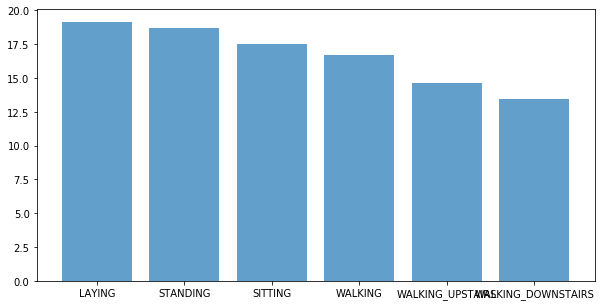

In [8]:
labels = pd.DataFrame(train.Activity.value_counts())    
labels['Label %'] = [(c/sum(labels.Activity))*100 for c in labels.Activity]
plotMyBarGraph(labels.index, labels["Label %"])

Conclusion : All calss labels in training data has almost similar representation. 

In [9]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)
print(X_train.shape)
print(Y_train_label.shape)
print(X_test.shape)
print(Y_test_label.shape)

(7352, 561)
(7352,)
(2947, 561)
(2947,)


# 4. Model Building
## KNeighborsClassifier


In [10]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Using Knn Algorithm

#### Findding Optimum value of neighbours

In [11]:
encoder = preprocessing.LabelEncoder()                        
Y_train = encoder.fit_transform(Y_train_label)
Y_test = encoder.fit_transform(Y_test_label)
labels = pd.DataFrame(Y_train_label,Y_train)
labels.groupby(labels.index)[0].unique()

0                [LAYING]
1               [SITTING]
2              [STANDING]
3               [WALKING]
4    [WALKING_DOWNSTAIRS]
5      [WALKING_UPSTAIRS]
Name: 0, dtype: object

In [12]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

In [13]:
scores_uniform = []
for i in range(10,51,10):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train_scale, Y_train)
    y_pred = knn.predict(x_test_scale)
    scores_uniform.append(accuracy_score(Y_test, y_pred))

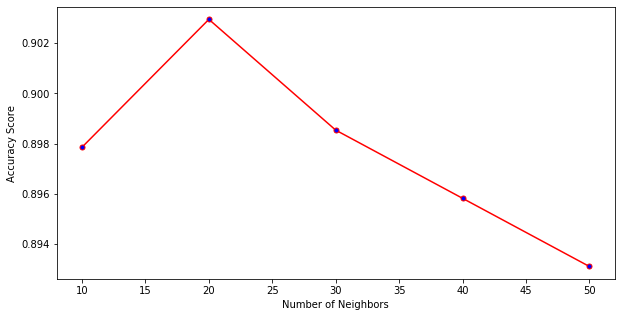

In [14]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(10,51,10)
plt.plot(xticks, scores_uniform, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [15]:
scores = []
for i in range(15,26):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train_scale, Y_train)
    y_pred = knn.predict(x_test_scale)
    scores.append(accuracy_score(Y_test, y_pred))

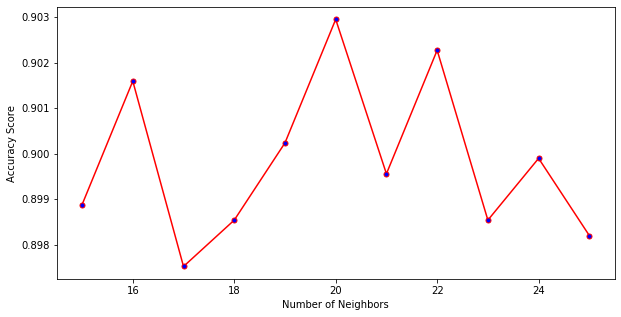

In [16]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(15,26)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [20]:
scores

array([0.89888022, 0.90159484, 0.8975229 , 0.89854089, 0.90023753,
       0.90295215, 0.89955887, 0.9022735 , 0.89854089, 0.8998982 ,
       0.89820156])

In [24]:
scores = np.array(scores)
optimumK = scores.argmax()+15
print('Optimal number of neighbors is:', optimumK)
print('Accuracy Score:' +str(scores.max()*100),'%')

Optimal number of neighbors is: 20
Accuracy Score:90.29521547336275 %


# 5. Evaluation

In [25]:
knn = KNeighborsClassifier(n_neighbors=optimumK)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [26]:
print(confusion_matrix(Y_test_label, y_pred_label))

[[535   1   1   0   0   0]
 [  0 400  87   0   0   4]
 [  0  37 495   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  53 325  42]
 [  0   0   0  41   5 425]]


In [27]:
print(classification_report(Y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.84      0.99      0.91       496
WALKING_DOWNSTAIRS       0.96      0.77      0.86       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.90      2947



# 6. Conclusion

### Knn Algorithm predicts with almost 91% accuracy
### Alomost more than 85% Precision, Recall and F1 Score 